In [2]:
import pandas as pd
import chardet

In [3]:
file='spam.csv'

In [4]:
dataframe= pd.read_csv(file,encoding='ISO-8859-1')
dataframe.head()

,Detection,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Detection   5572 non-null   object
 1   Message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
dataframe.shape

(5572, 5)

In [9]:
dataframe.isnull().sum()

Detection        0
Message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
dataframe.duplicated().sum()

403

In [11]:
dataframe=dataframe.drop_duplicates(keep='first')

In [13]:
dataframe.duplicated().sum()

0

In [14]:
dataframe.shape

(5169, 5)

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Detection   5169 non-null   object
 1   Message     5169 non-null   object
 2   Unnamed: 2  43 non-null     object
 3   Unnamed: 3  10 non-null     object
 4   Unnamed: 4  5 non-null      object
dtypes: object(5)
memory usage: 242.3+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
dataframe['Target']=le.fit_transform(dataframe['Detection'])
dataframe.head()

,Detection,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,Target
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


In [21]:
dataframe['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

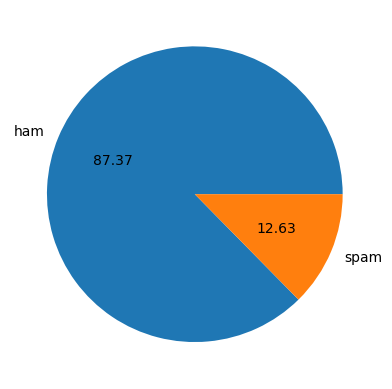

In [23]:
import matplotlib.pyplot as plt
plt.pie(dataframe['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
import nltk

In [26]:
dataframe['Total_letters']=dataframe['Message'].apply(len)
dataframe.head()

,Detection,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,Target,Total_letters
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,61


In [27]:
df=dataframe.drop(["Detection"],axis=1)
df.head()

,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,Target,Total_letters
0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,111
1,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,155
3,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,49
4,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,61


In [28]:
from nltk import word_tokenize, sent_tokenize

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [31]:
df['Total_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,Target,Total_letters,Total_words
0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,111,24
1,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,155,37
3,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,61,15


In [43]:
df['Total_sent']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,Target,Total_letters,Total_words,Total_sent
0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,2,24,2
1,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,2,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,2,37,2
3,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,1,13,1
4,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,1,15,1


In [44]:
df.describe()

,Target,Total_letters,Total_words,Total_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,1.965564,18.455794,1.965564
std,0.332253,1.448541,13.324758,1.448541
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,1.000000,15.000000,1.000000
75%,0.000000,2.000000,26.000000,2.000000
max,1.000000,38.000000,220.000000,38.000000


In [45]:
#ham message
df[df['Target']==0].describe()

,Target,Total_letters,Total_words,Total_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,1.820195,17.123782,1.820195
std,0.0,1.383657,13.493970,1.383657
min,0.0,1.000000,1.000000,1.000000
25%,0.0,1.000000,8.000000,1.000000
50%,0.0,1.000000,13.000000,1.000000
75%,0.0,2.000000,22.000000,2.000000
max,0.0,38.000000,220.000000,38.000000


In [46]:
#spam message
df[df['Target']==1].describe()

,Target,Total_letters,Total_words,Total_sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,2.970904,27.667688,2.970904
std,0.0,1.488425,7.008418,1.488425
min,1.0,1.000000,2.000000,1.000000
25%,1.0,2.000000,25.000000,2.000000
50%,1.0,3.000000,29.000000,3.000000
75%,1.0,4.000000,32.000000,4.000000
max,1.0,9.000000,46.000000,9.000000


In [59]:
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4728\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Target,Total_letters,Total_words,Total_sent
Target,1.000000,0.263939,0.262912,0.263939
Total_letters,0.263939,1.000000,0.679971,1.000000
Total_words,0.262912,0.679971,1.000000,0.679971
Total_sent,0.263939,1.000000,0.679971,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_4728\1112500214.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

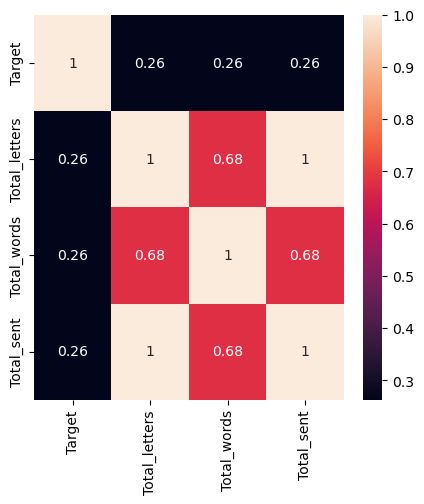

In [60]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

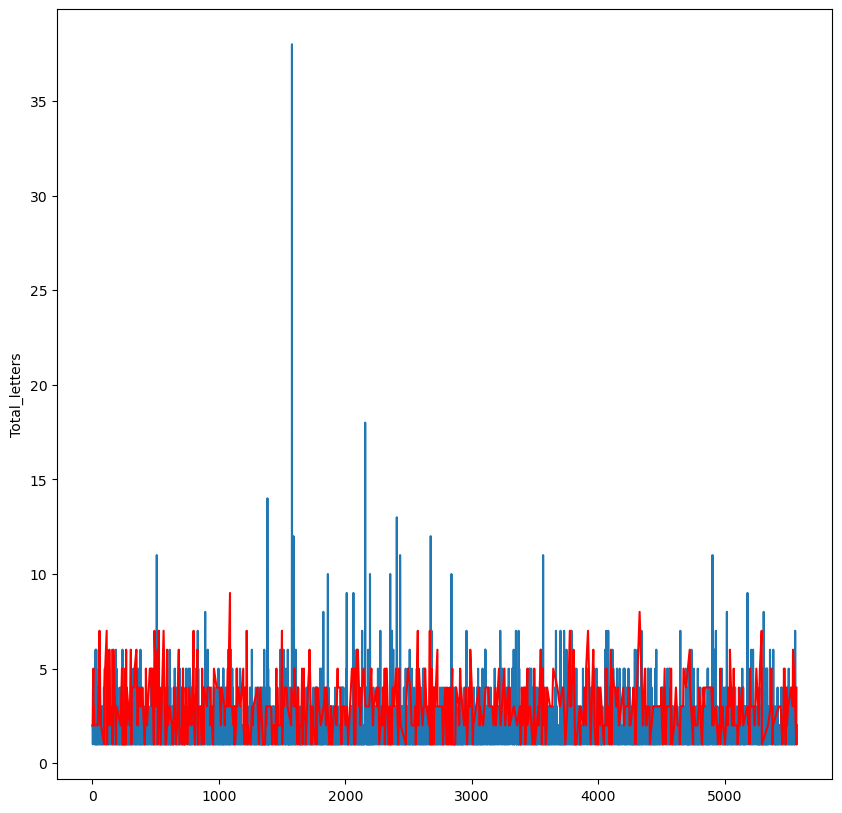

In [47]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.lineplot(df[df["Target"]==0]['Total_letters'])
sns.lineplot(df[df["Target"]==1]['Total_letters'],color="red")
plt.show()

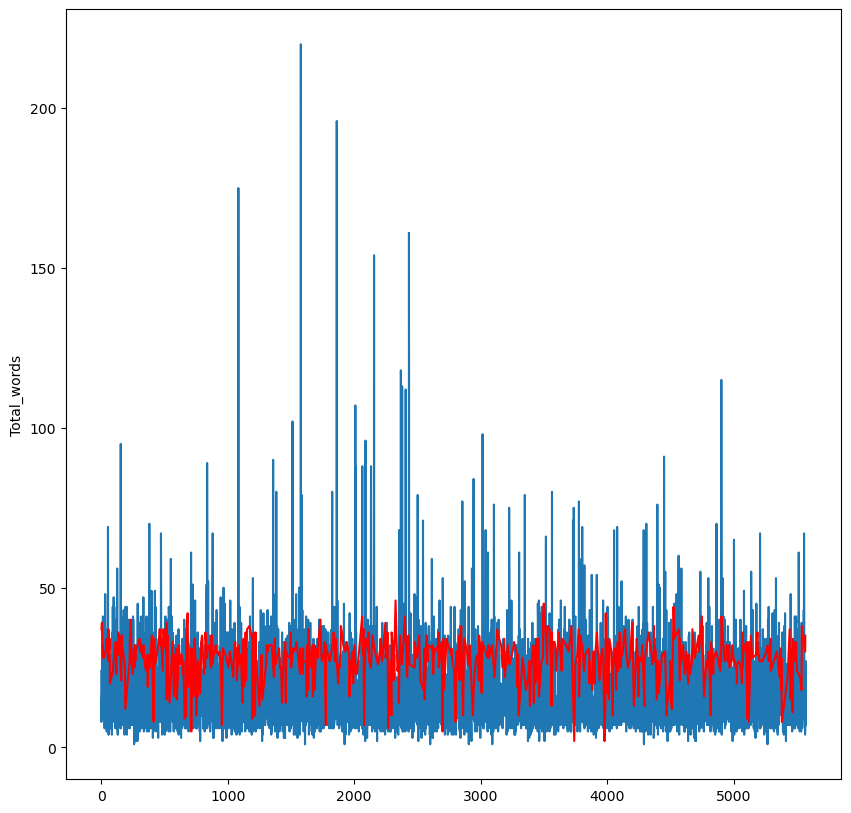

In [48]:
plt.figure(figsize=(10,10))
sns.lineplot(df[df["Target"]==0]['Total_words'])
sns.lineplot(df[df["Target"]==1]['Total_words'],color="red")
plt.show()

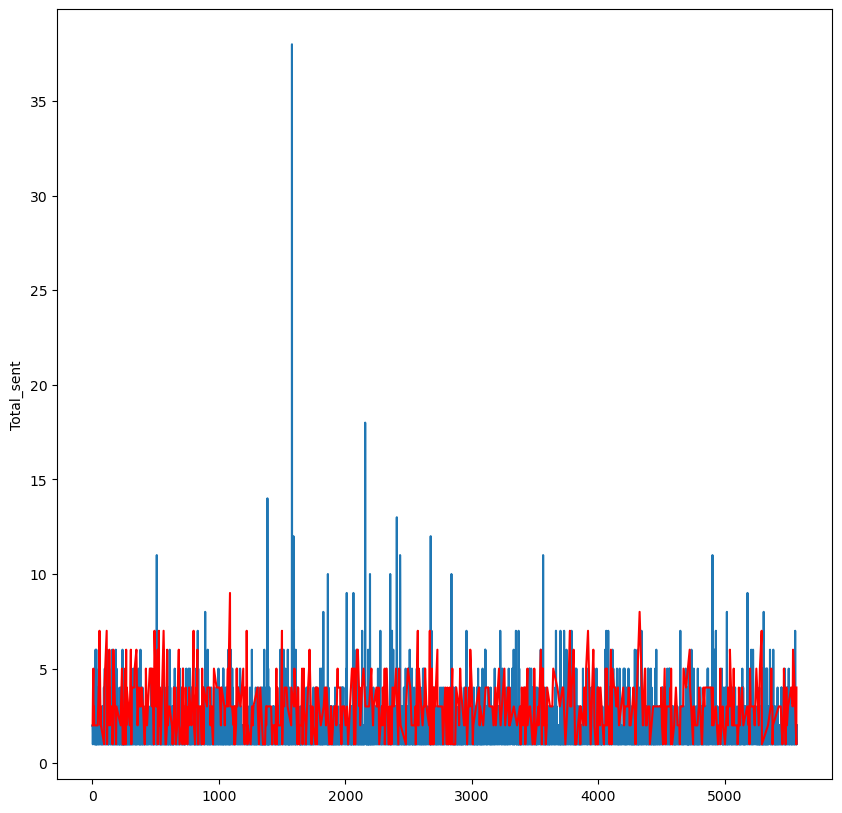

In [55]:
plt.figure(figsize=(10,10))
sns.lineplot(df[df["Target"]==0]['Total_sent'])
sns.lineplot(df[df["Target"]==1]['Total_sent'],color="red")
plt.show()

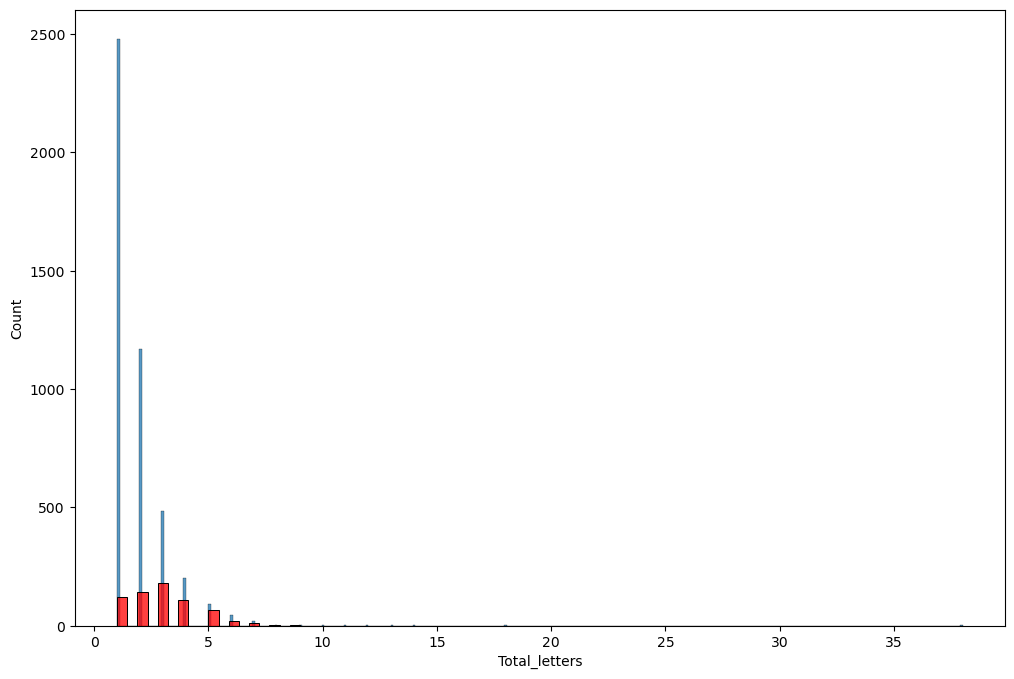

In [39]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["Target"]==0]['Total_letters'])
sns.histplot(df[df["Target"]==1]['Total_letters'],color="red")
plt.show()

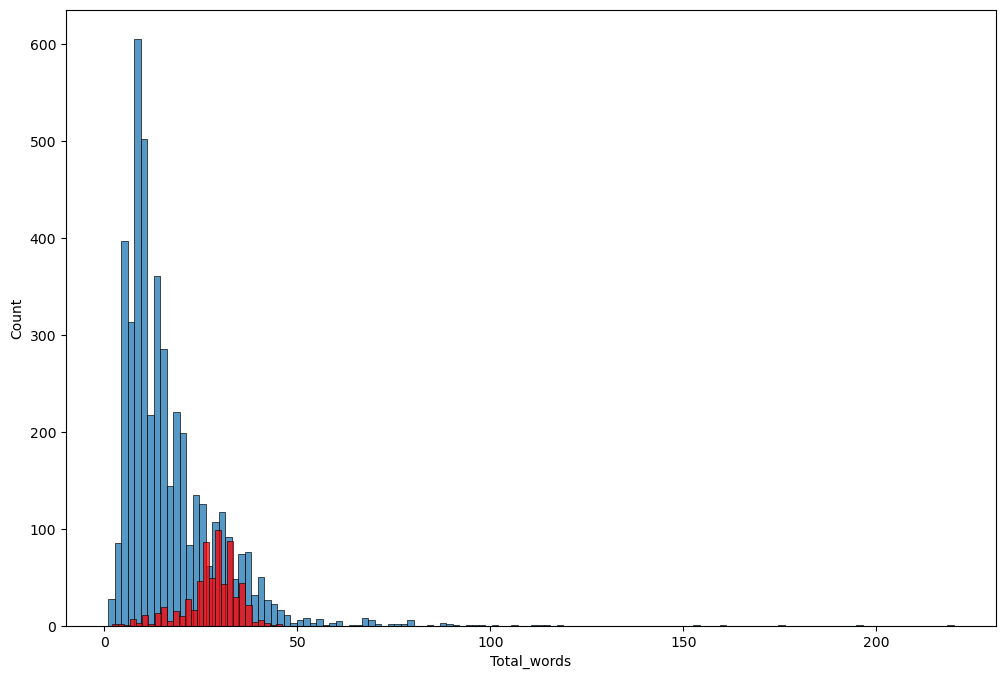

In [41]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["Target"]==0]['Total_words'])
sns.histplot(df[df["Target"]==1]['Total_words'],color="red")
plt.show()

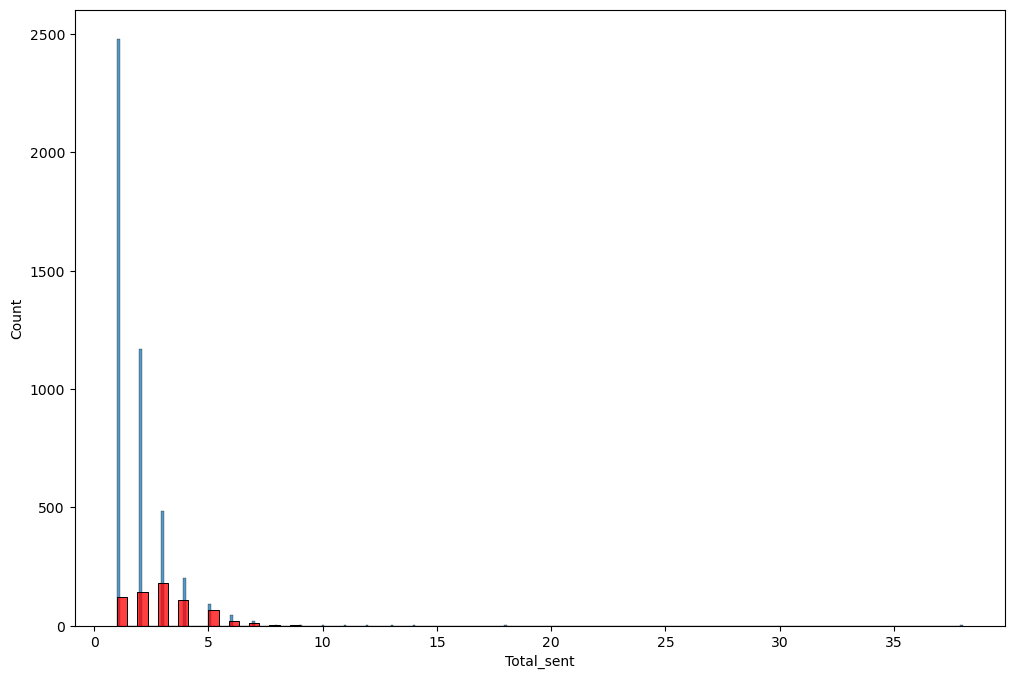

In [50]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["Target"]==0]['Total_sent'])
sns.histplot(df[df["Target"]==1]['Total_sent'],color="red")
plt.show()

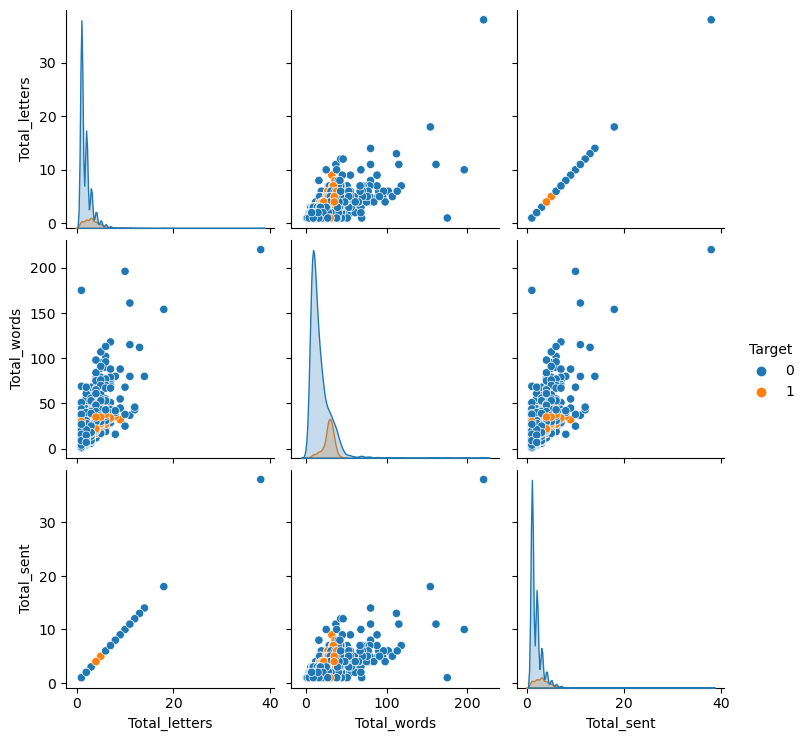

In [57]:
sns.pairplot(df,hue='Target')

In [61]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
pip install stopwords

Note: you may need to restart the kernel to use updated packages.


In [66]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [67]:
import stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
df['Message'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [82]:
def transform_text(Message):
    Message=Message.lower()
    Message=nltk.word_tokenize(Message)
    y=[]
    for i in Message:
        if i.isalnum():
            y.append(i)
    Message=y[:]
    y.clear()
    
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    Message=y[:]
    y.clear()
    for i in Message:
        y.append(ps.stem(i))
    return " ".join(y)

In [89]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
transform_text("Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx.")

'okay name ur price long legal wen pick u ave x am xx'

In [91]:
df['transformed_text']=df['Message'].apply(transform_text)
df.head()

,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,Target,Total_letters,Total_words,Total_sent,transformed_text
0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,2,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,2,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,2,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,1,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,1,15,1,nah think goe usf live around though


In [92]:
spam_corpus=[]
for item in df[df['Target']==1]['transformed_text'].tolist():
    for word in item.split():
        spam_corpus.append(word)

In [93]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [102]:
ham_corpus=[]
for item in df[df['Target']==0]['transformed_text'].tolist():
    for word in item.split():
        ham_corpus.append(word)

In [103]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa